## Прикладная статистика в машинном обучении

### Домашнее задание \#2: EM-алгоритм. Линейная регрессия.

- Домашнее задание оценивается в 10 баллов.


- Решения принимаются до **1 декабря 2020 года**, 23:59 МСК включительно.
Работы, отправленные после дедлайна, оцениваются следующим образом:
    - До 7:00 МСК 2 октября: максимум 8 баллов.
    - До 23:59 МСК 2 октября: максимум 7 баллов.
    - До 23:59 МСК 3 октября: максимум 6 баллов.
    
    
- Работы, отправленные после 3-го октября, будут проверены без оценки.


- Все решения нужно загрузить в личный репозиторий на [GitHub Classroom](https://classroom.github.com/a/AGkPGEn3).


- Репозиторий должен содержать: один .ipynb-файл с решениями задач, который должен иметь название `name_surname_hw2.pdf`


- Весь код должен быть написан на Python.


- Разрешается использовать без доказательства любые результаты, встречавшиеся на лекциях или семинарах по курсу, если получение этих результатов не является вопросом задания. 


- Разрешается использовать любые свободные источники с указанием ссылки на них.


- Плагиат не допускается.
При обнаружении случаев списывания, 0 за работу выставляется всем участникам нарушения, даже если можно установить, кто у кого списал. 
---

### Задача 1: "Separe!" (5 баллов).

В этой задаче мы снова будем помогать Гарри и Гермионе, но уже не из оригинального цикла, а из "Методов рационального мышления". Гарри и Гермиона хотят изучить свойства практической реализации EM-алгоритма для разделения смеси нормальных распределений.

**Пункт 1.** Напишите функцию `create_mixture(mu, sigma, n)`, которая принимает вектор математических ожиданий `mu` и вектор дисперсий `sigma` длины $k$, генерирует `n` наблюдений из каждого из $k$ нормальных распределений, перемешивает эти $nk$ наблюдений и возвращает вектор, содержащий смесь распределений.

In [1]:
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
sns.set()
%matplotlib inline

In [2]:
def create_mixture(mu, sigma, n):
    '''
    Attributes:
    ---
    mu: ndarray
        ndarray of length k containing k expectations of normal distributions
    sigma: ndarray
        ndarray of length k containing k variances of normal distributions
    n: int
        number of samples from each distributions
    
    Returns:
    ---
    mixture: ndarray
        ndarray of length kn with mixture of samples from k normal distributions
    '''
    res = np.array([])
    for cur_mu, cur_sigma in zip(mu, sigma):
        res = np.append(res, np.random.normal(cur_mu, cur_sigma, n))    # n samples for current distribution
    np.random.shuffle(res)                                              # shuffle observations
    return res
    pass

**Пункт 2.** Протестируйте написанную функцию для случая $k = 3$, самостоятельно выбрав параметры соответствующих нормальных распределений и число наблюдений. Постройте две картинки: на одной изобразите три гистограммы, по одной для каждого из распределений, а на вторую поместите гистограмму полученной смеси.

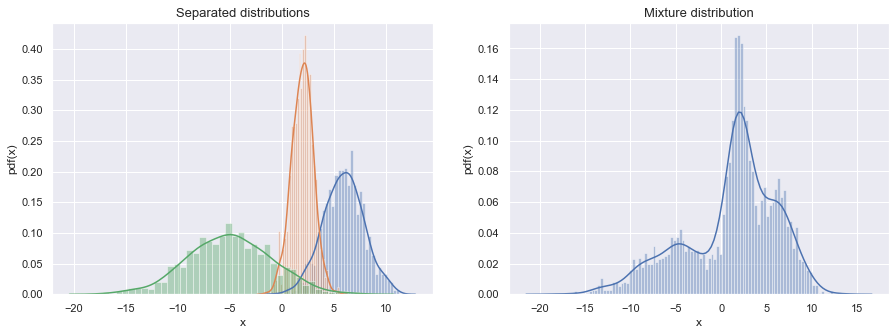

In [3]:
mu_ = [6,2,-5]
sigma_ = [2, 1, 4]
fig, ax = plt.subplots(1,2, figsize=(15,5))
ax[0].set_title('Separated distributions', fontsize=13)
ax[0].set(ylabel='pdf(x)', xlabel='x')
ax[1].set_title('Mixture distribution', fontsize=13)
ax[1].set(ylabel='pdf(x)', xlabel='x')
for cur_mu, cur_sigma in zip(mu_, sigma_):
    sns.distplot(np.random.normal(cur_mu, cur_sigma, 1000), bins=40, ax=ax[0])
mixture = create_mixture(mu_, sigma_, 1000)
sns.distplot(mixture, bins=100, ax=ax[1])
plt.show()

**Пункт 3.** Гермиона помнит формулы шагов EM-алгоритма только для случая $k = 2$, что ограничивает проведение исследования. Выведите формулы шагов EM-алгоритма для разделения смеси $k$ нормальных распределений. Запишите основные шаги вывода формул и финальный результат в ячейке Markdown ниже.

*Пусть есть $n$ наблюдений. Введём латентную переменную $z \in \{1,..,k\}$ - номер кластера (один из $k$ нормальных распределений);* $\gamma_n = P\{z = n\}, \, n = \overline{1,k-1}, \gamma_k = 1 - \sum\limits_{n=1}^{k-1}\gamma_n, \, \theta = (\mu_1, \sigma_1, \mu_2, \sigma_2, ...,\mu_k, \sigma_k, \gamma_1,...,\gamma_{k-1})$

**E1:** 
$$p(z_i = t \mid x_i, \theta_{old}) = \frac{p(z_i = t, x_i \mid\theta_{old})\gamma_t}{\sum\limits_{n=1}^{k} \gamma_n p(z_i = n, x_i \mid \theta_{old})}= \\
=\frac{\frac{1}{\sqrt{2\pi\sigma_t^2}} \exp{\left(-\frac{(x_i-\mu_t)^2}{2\sigma_t^2}\right)}\gamma_t}{\frac{1}{\sqrt{2\pi}}\sum\limits_{n=1}^{k}\frac{1}{\sqrt{\sigma_n^2}} \exp{\left(-\frac{(x_i-\mu_n)^2}{2\sigma_n^2}\right)}\gamma_n} = g_i^{t}, \qquad t = \overline{1,k-1} \text{  (t - верхний индекс)}$$
$$p(z_i = k \mid x_i, \theta_{old}) = 1 - \sum\limits_{t=1}^{k-1}g_i^t = g_i^k$$

**E2:**
$$Q(\theta) = \sum\limits_{i=1}^{n} \left[\sum\limits_{t=1}^{k}g_i^t(\ln{p(x_i, z_i = t \mid \theta) + \ln{\gamma_t}})\right] = \sum\limits_{i=1}^{n} \left[\sum\limits_{t=1}^{k} g_i^t \left(-\frac{1}{2}\ln{2\pi\sigma_t^2} - \frac{(x_i-\mu_t)^2}{2\sigma_t^2} + \ln{\gamma_t}\right)\right] \longrightarrow \max\limits_{\theta}$$

**M:**
- *Заметим, что $\gamma_k = 1 - \gamma_1 - \gamma_2-...-\gamma_{k-1}$*

    $$Q^{\prime}_{\gamma_t} = \sum\limits_{i=1}^{n} \left[\frac{g_i^t}{\gamma_t} - \frac{g_i^k}{\gamma_k}\right] = \frac{1}{\gamma_t \gamma_k}\sum\limits_{i=1}^n (g_i^t \gamma_k - g_i^k \gamma_t), \qquad t = \overline{1,k-1}$$

    *Новые значения $\gamma_t^{new}$ - решения системы уравнений:*
    $$\begin{cases}
        \frac{1}{\gamma_1^{new} \gamma_k^{new}}\sum\limits_{i=1}^n (g_i^1 \gamma_k^{new} - g_i^k \gamma_1^{new}) = 0\\
        \frac{1}{\gamma_2^{new} \gamma_k^{new}}\sum\limits_{i=1}^n (g_i^2 \gamma_k^{new} - g_i^k \gamma_2^{new}) = 0\\
        ... \\
        \frac{1}{\gamma_{k-1}^{new} \gamma_k^{new}}\sum\limits_{i=1}^n (g_i^{k-1} \gamma_k^{new} - g_i^k \gamma_{k-1}^{new}) = 0 \\
        \gamma_k^{new} = 1 - \gamma_1^{new} - \gamma_2^{new}-...-\gamma_{k-1}^{new}
    \end{cases} \iff
    \begin{cases}
        \gamma_k^{new}\sum\limits_{i=1}^{n}g_i^1 = \gamma_1^{new}\sum\limits_{i=1}^{n}g_i^k \\
        \gamma_k^{new}\sum\limits_{i=1}^{n}g_i^2 = \gamma_2^{new}\sum\limits_{i=1}^{n}g_i^k \\
        ...\\
        \gamma_k^{new}\sum\limits_{i=1}^{n}g_i^{k-1} = \gamma_{k-1}^{new}\sum\limits_{i=1}^{n}g_i^k \\
        \gamma_k^{new} = 1 - \gamma_1^{new} - \gamma_2^{new}-...-\gamma_{k-1}^{new}
    \end{cases}$$
- *Найдём новые значения* $\mu_t^{new}, \quad t = \overline{1,k}$:
    $$Q^{\prime}_{\mu_t} = \frac{1}{\sigma_t^2}\sum\limits_{i=1}^{n} g_i^t(x_i - \mu_t) \Rightarrow \frac{1}{\sigma_t^2}\sum\limits_{i=1}^{n} g_i^t(x_i - \mu_t^{new}) = 0 \iff \mu_t^{new} = \frac{\sum\limits_{i=1}^{n}g_i^t x_i}{\sum\limits_{i=1}^{n}g_i^t}$$

- *Найдём новые значения* $\sigma_t^{new}, \quad t = \overline{1,k}:$
    $$Q^{\prime}_{\sigma_t} = \frac{1}{\sigma_t^3}\sum\limits_{i=1}^{n}(-\sigma_t^2 g_i^t + (x_i - \mu_t)^2g_i^t) \Rightarrow \sum\limits_{i=1}^{n}(-(\sigma_t^{new})^2 g_i^t + (x_i - \mu_t^{new})^2g_i^t) = 0 \iff (\sigma_t^{new})^2 = \frac{\sum\limits_{i=1}^{n}g_i^t(x_i - \mu_t^{new})^2}{\sum\limits_{i=1}^{n}g_i^t}$$

**Пункт 4.** Реализуйте EM-алгоритм для разделения смеси нормальных распределений в виде функции `EM(mixture, k, theta)`. На вход эта функция принимает вектор `x`, содержащий смесь нормальных распределений, число предполагаемых кластеров `k` и вектор изначальных предположений о параметрах распределений и вероятностях принадлежности к соответствующим кластерам `theta`. Функция должна возвращать кортеж `(theta_new, Q_history)`, содержащий вектор параметров `theta_new`, полученный после работы EM-алгоритма, и историю обновлений функции M-шага $Q$.

In [4]:
# Q function calculation
from scipy.stats import norm
def Q_f(x, theta, p_z):
    Q = 0
    for (mu, sigma, gamma), p in zip(theta, p_z):
        Q += p * (norm.logpdf(x, mu, sigma) + np.log(gamma))
    return np.sum(Q)

In [5]:
def EM(mixture, k, theta):
    '''
    mixture: ndarray
        ndarray containing the mixture of normal distributions
    k: int
        supposed number of clusters
    theta: ndarray
        ndarray containing the initial parameters for each distribution and unconditional probabilities for each 
        cluster
    '''
    Q_history = []
    
    for i in range(100):
        # E-step
        p_z = []
        denom = 0
        for mu_, sigma_, gamma_ in theta:
            denom += norm.pdf(mixture, mu_, sigma_) * gamma_
        for mu, sigma, gamma in theta:
            p_z.append(norm.pdf(mixture, mu, sigma) * gamma / denom)

        Q_history.append(Q_f(mixture, theta, p_z))    # Q(theta_old, theta_old) - p_z from theta_old

        if i > 0:
            if (Q_history[i] - Q_history[i-1])**2 < 1e-4:
                break

        # M-step
        mu_new = []
        for p in p_z:
            mu_new.append(np.sum(p * mixture) / np.sum(p))

        sigma_new = []
        for p, mu in zip(p_z, mu_new):
            sigma_new.append(np.sqrt(np.sum(p * ((mixture - mu) ** 2)) / np.sum(p)))

        Gamma = np.diagflat([-np.sum(p_z[-1])] * k)    # diagonal matrix with sum of p(z = k | x, theta_old)
        Gamma[-1] = 1    # 1*gamma_1 + ... + 1*gamma_k = 1
        Gamma[:k-1,k-1] = np.sum(p_z, axis=1)[:-1]    # cofficients for gamma_k - sums of p_z
        
        gamma_new = np.linalg.solve(Gamma, np.append(np.zeros(k-1),1))    # linear equation Gamma = [0,...,0,1]'
        theta_new = np.array(list(zip(mu_new, sigma_new, gamma_new)))
        theta = theta_new
        
    return(theta_new, Q_history)
    pass

**Пункт 5.** Используйте сгенерированную в Пункте 2 смесь, чтобы протестировать работу EM-алгоритма. Задайте вектор `theta` каким-нибудь разумным образом, но так, чтобы изначальные параметры не совпадали с истинными, которые вы использовали для генерации смеси (Гарри считает это нарушением чистоты эксперимента). Параметр `k` укажите равным 3.

In [6]:
k = 3
mu_init = []
n = mixture.shape[0]
sigma_init = [np.sqrt(np.max(mixture) - np.min(mixture) / 2)] * k
gamma_init = [1 / k] * k
for i in range(k):
    mu_init.append(np.mean(np.sort(mixture)[i * n // k : (i + 1) * n // k]))    # mu - mean of each k'th window in sorted array 

In [7]:
theta = list(zip(mu_init, sigma_init, gamma_init))
print('Initial theta:')
for mu, sigma, gamma in theta:
    print('mu = %.4f, sigma = %.4f, gamma = %.4f' % (mu, sigma, gamma))

Initial theta:
mu = -4.8222, sigma = 4.7766, gamma = 0.3333
mu = 2.0066, sigma = 4.7766, gamma = 0.3333
mu = 6.1507, sigma = 4.7766, gamma = 0.3333


In [8]:
theta_5, Q_5 = EM(mixture, 3, theta)

In [9]:
print('New theta:')
for mu, sigma, gamma in theta_5:
    print('mu = %.4f, sigma = %.4f, gamma = %.4f' % (mu, sigma, gamma))

New theta:
mu = -4.6807, sigma = 4.1039, gamma = 0.3281
mu = 1.9172, sigma = 0.9287, gamma = 0.3369
mu = 5.9758, sigma = 2.0627, gamma = 0.3350


In [10]:
print('True theta:')
for mu, sigma in zip(mu_, sigma_):
    print('mu = %.4f, sigma = %.4f' % (mu, sigma))

True theta:
mu = 6.0000, sigma = 2.0000
mu = 2.0000, sigma = 1.0000
mu = -5.0000, sigma = 4.0000


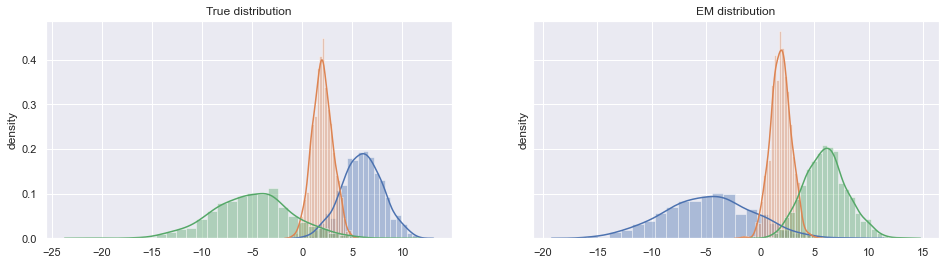

In [11]:
fig, axs = plt.subplots(1, 2, figsize=(16,4), sharey=True)
for mu, sigma in zip(mu_, sigma_):
    sns.distplot(np.random.normal(mu, sigma, 1000), ax = axs[0])
axs[0].set_title('True distribution')
axs[0].set(ylabel='density')
for mu, sigma,_ in theta_5:
    sns.distplot(np.random.normal(mu, sigma, 1000), ax = axs[1])
axs[1].set_title('EM distribution')
axs[1].set(ylabel='density')
plt.show()

**Пункт 6.** Гермиона утверждает, что с теоретической точки зрения функция $Q$ должна монотонно возрастать: на каждой итерации EM-алгоритма мы увеличиваем значение правдоподобия. "What do you think you know and how do you think you know it?" - отвечает Гарри и задаёт три своих вопроса:
1. О каком правдоподобии идёт речь: $p(X|\theta)$ или $p(X, Z | \theta)$?
2. Увеличивается или не уменьшается? 
3. Почему это утвержедение верно? 

Помогите Гермионе ответить на вопросы Гарри. Запишите ответы в ячейке Markdown ниже.

*Подсказка:* соответствующая цепочка неравенств была на одной из лекций.

1-2. *Увеличивается значение правдоподобия $p(X \mid \theta)$*
3. *Из семинаров 4-5 известно, что $\ln{p(X \mid \theta)} = D_{KL}(P\{Z = j\} \mid\mid P\{Z=j \mid X, \theta\}) + L(P\{Z = j\}, \theta)$. Т.к. $D_{KL} \geq 0$, функция $L(\underbrace{P\{Z = j\}}_{=q}, \theta)$ является нижней оценкой для $\ln{p(X \mid \theta)}$.*
    
    *На шаге Е функция $L(q, \theta) = \ln{p(X \mid \theta)} - D_{KL}(q \mid\mid P\{Z=j \mid X, \theta\})$ максимизируется по $q = P(Z = j)$. Поскольку первое слагаемое не зависит от $q$, $L$ максимально при минимальном $D_{KL}$, т.е. при $D_{KL} = 0$. (Из семинара известно, что это получается при $q = P(Z \mid X, \theta_{old})$)*
    
    *Тогда получаем:*
    $$\ln{p(X \mid \theta_{old})} \stackrel{\text{E-step}}{=} L(q_{new}, \theta_{old})$$
    
    *На шаге М функция $L(q_{new}, \theta)$ максимизируется по $\theta$:*
    
    $$L(q_{new}, \theta_{old}) \leq \max\limits_{\theta}L(q_{new}, \theta) = L(q_{new}, \theta_{new})$$
    
    *Поскольку $L(q, \theta)$ - нижняя граница $\ln{p(X \mid \theta)}$, получаем следующую цепочку:*
    
    $$\ln{p(X \mid \theta_{old})} \stackrel{\text{E-step}}{=} L(q_{new}, \theta_{old}) \stackrel{\text{M-step}}{\leq} L(q_{new}, \theta_{new}) \leq \ln{p(X \mid \theta_{new})}$$
    
    *Таким образом, при новых параметрах $\theta_{new}$ увеличивается логарифм правдоподобия $\ln{p(X \mid \theta)}$.*

**Пункт 7.** Разобравшись с предыдущим вопросом, Гермиона вспомнила, что она недавно [прочитала](https://stats.stackexchange.com/questions/341173/em-algorithm-seems-to-work-but-q-is-not-monotonic-possible-reasons), что при практической реализации EM-алгоритма динамика $Q$ зависит от того, на каком шаге обновляется история изменения $Q$. Постройте два графика с динамикой $Q$, подтверждающие слова Гермионы, и объясните, используя материалы по ссылке, почему Гермиона права. Используйте те же параметры, что и в Пункте 5.

In [12]:
def EM2(mixture, k, theta):    # Q-update after M-step
    
    Q_history = []
    
    for i in range(100):
        # E-step
        p_z = []
        denom = 0
        for mu_, sigma_, gamma_ in theta:
            denom += norm.pdf(mixture, mu_, sigma_) * gamma_
        for mu, sigma, gamma in theta:
            p_z.append(norm.pdf(mixture, mu, sigma) * gamma / denom)

        # M-step
        mu_new = []
        for p in p_z:
            mu_new.append(np.sum(p * mixture) / np.sum(p))

        sigma_new = []
        for p, mu in zip(p_z, mu_new):
            sigma_new.append(np.sqrt(np.sum(p * ((mixture - mu) ** 2)) / np.sum(p)))

        Gamma = np.diagflat([-np.sum(p_z[-1])] * k)    # diagonal matrix with sum of p(z = k | x, theta_old)
        Gamma[-1] = 1    # 1*gamma_1 + ... + 1*gamma_k = 1
        Gamma[:k-1,k-1] = np.sum(p_z, axis=1)[:-1]    # cofficients for gamma_k - sums of p_z
        
        gamma_new = np.linalg.solve(Gamma, np.append(np.zeros(k-1),1))    # linear equation Gamma = [0,...,0,1]'
        theta_new = np.array(list(zip(mu_new, sigma_new, gamma_new)))
        
        theta = theta_new

        Q_history.append(Q_f(mixture, theta, p_z))    # Q(theta_old, theta_new) (p_z from theta_old)
        
        if i > 0:
            if (Q_history[i] - Q_history[i-1])**2 < 1e-4:
                break
        
        
    return(theta_new, Q_history)
    pass

In [13]:
_, Q_7 = EM2(mixture, 3, theta)

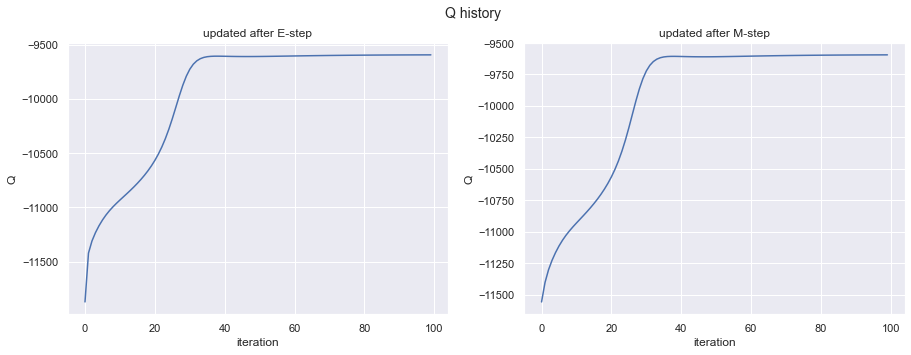

In [14]:
fig, ax = plt.subplots(1, 2, figsize=(15,5))
fig.suptitle('Q history', fontsize=14)
ax[0].set_title('updated after E-step')
ax[0].set(xlabel='iteration', ylabel='Q')
ax[0].plot(Q_5)    # from task 1.5

ax[1].set_title('updated after M-step')
ax[1].set(xlabel='iteration', ylabel='Q')
ax[1].plot(Q_7)
plt.show()

*Как можно заметить, значения Q изменяются не монотонно, как могли бы ожидать (алгоритм по сути должен максимизировать правдоподобие). Объяснить это можно следующим образом:*

$$Q(\theta_{new}, \theta_{old}) = \mathbb{E}(\ln{p(X, Z \mid \theta_{new})} \mid X, \theta_{old})$$

*Максимизируя $Q$ по $\theta_{new}$ мы получаем на следующем шаге* 
$$Q(\theta_{t+1}, \theta_{t}) \geq Q(\theta_{t}, \theta_{t})$$

*Однако неизвестно, как соотносятся $Q(\theta_{t+1}, \theta_{t})$ и $Q(\theta_{t+1}, \theta_{t+1})$, на соседних итерациях считаем $Q(\theta_{t}, \theta_{t})$ и $Q(\theta_{t+1}, \theta_{t+1})$:*

$$Q(\theta_{t+1}; \theta_t) \geq Q(\theta_t; \theta_t) \, ? \, Q(\theta_t; \theta_{t-1}) \geq Q(\theta_{t-1}; \theta_{t-1})$$

*Получаем, что функция не должна монотонно возрастать.*

**Пункт 8.** Гарри хочет экспериментально проверить поведение EM-алгоритма при различных комбинациях параметров. Выберите какой-нибудь количественный способ оценить качество работы EM-алгоритма (подойдёт любое разумное обоснованное решение) и оцените качество работы для сетки параметров $k = (2, 5, 10)$, $n = (10, 100, 1000)$.
Для этого:
1. Сгенерируйте смесь распределений с нужным числом $k$ и $n$.
2. Запустите функцию `EM(...)` на этой смеси. Параметр `k` укажите равным тестируемому значению (то есть 2, 5 или 10). 

Вектор начальных параметров `theta` для каждого случая генерируйте на основе какой-либо разумной статистики (например, для дисперсий можно взять разность крайних значений вариационного ряда, делённую на два). Постройте графики зависимости качества работы EM-алгоритма от используемых параметров `n` и `k` (то есть всего 9 графиков) и прокомментируйте наблюдаемые зависимости.

*Заведём случайный массив истинных значений $\mu$ и $\sigma$ размера 10 (см. ячейку ниже). Для каждого значения $k$ будем выбирать из этих массивов случайным образом $k$ значений параметров и создавать для них растворы (т.е. для каждого фиксированного значения $k$ создаётся три раствора с одинаковыми параметрами, но разными значениями $n$). Оценим качество алгоритма минимизируя усреднённую сумму квадратов ошибок параметров (параметры и оценки отсортируем по значениям $\mu$ и $\hat{mu}$ в возрастающем порядке, чтобы сопоставить параметры и их оценки между собой).*
$$\frac{1}{3k} \sum\limits_{\tau \in \theta}(\tau - \hat{\tau})^2$$

*Инициализировать начальные значения `theta` будем как в предыдущих заданиях - в качестве начальных средних возьмём средние значения каждого $t$-порядкового окна (из $k$ одинаковых непересекающихся окон в отсортированном массиве значений наблюдений), в качестве дисперсии возьмём разность крайних значений вариационного ряда, делённую на два, в качестве вероятностей принадлежности к классу возьмём $\frac{1}{k}$ (см. функцию `initialize_theta`).*

In [15]:
def EM_with_history(mixture, k, theta):
    '''
    mixture: ndarray
        ndarray containing the mixture of normal distributions
    k: int
        supposed number of clusters
    theta: ndarray
        ndarray containing the initial parameters for each distribution and unconditional probabilities for each 
        cluster
    '''
    Q_history = []
    theta_history = []
    
    for i in range(100):
        # E-step
        p_z = []
        denom = 0
        for mu_, sigma_, gamma_ in theta:
            denom += norm.pdf(mixture, mu_, sigma_) * gamma_
        for mu, sigma, gamma in theta:
            p_z.append(norm.pdf(mixture, mu, sigma) * gamma / denom)

        Q_history.append(Q_f(mixture, theta, p_z))

        if i > 0:
            if (Q_history[i] - Q_history[i-1])**2 < 1e-4:
                break

        # M-step
        mu_new = []
        for p in p_z:
            mu_new.append(np.sum(p * mixture) / np.sum(p))

        sigma_new = []
        for p, mu in zip(p_z, mu_new):
            sigma_new.append(np.sqrt(np.sum(p * ((mixture - mu) ** 2)) / np.sum(p)))

        Gamma = np.diagflat([-np.sum(p_z[-1])] * k)    # diagonal matrix with sum of p(z = k | x, theta_old)
        Gamma[-1] = 1    # 1*gamma_1 + ... + 1*gamma_k = 1
        Gamma[:k-1,k-1] = np.sum(p_z, axis=1)[:-1]    # cofficients for gamma_k - sums of p_z
        
        gamma_new = np.linalg.solve(Gamma, np.append(np.zeros(k-1),1))    # linear equation Gamma = [0,...,0,1]'
        theta_new = np.array(list(zip(mu_new, sigma_new, gamma_new)))
        theta_history.append(theta)
        theta = theta_new
        
    return(theta_new, Q_history, theta_history)
    pass

In [16]:
mu_grid = np.random.choice(np.arange(-100, 100, 5), size=10)
sigma_grid = np.random.uniform(1, 10, 10)
print('Grid of mu values:', mu_grid)
print('Grid of sigma values:', ["{:0.4f}".format(x) for x in sigma_grid])

Grid of mu values: [ 15 -70 -15   5  30 -85 -40 -45 -30  85]
Grid of sigma values: ['9.8621', '7.1377', '2.1669', '8.4756', '9.7289', '7.7800', '4.1740', '1.4664', '3.2835', '5.7985']


In [17]:
def initialize_theta(mixture, k):
    mu_init = []
    n = mixture.shape[0]
    sigma_init = [np.sqrt(np.max(mixture) - np.min(mixture) / 2)] * k
    gamma_init = [1 / k] * k
    for i in range(k):    # mu - mean of each k'th window in sorted array 
        mu_init.append(np.mean(np.sort(mixture)[i * n // k : (i + 1) * n // k]))
    return list(zip(mu_init, sigma_init, gamma_init))

In [18]:
k_grid = [2, 5, 10]
n_grid = [10, 100, 1000]

theta_true = []
theta_est = []
mixtures = []
theta_history = []

for i in range(len(k_grid)):
    k = k_grid[i]
    mu_true = np.random.choice(mu_grid, k, replace=False)   # random int <= 10
    sigma_true = np.random.choice(sigma_grid, k)    # random int <= 10
    theta_true.append(list(zip(mu_true, sigma_true)))

    for j in range(len(n_grid)):
        n = n_grid[j]
        
        cur_mixture = create_mixture(mu_true, sigma_true, n)
        mixtures.append(cur_mixture)
        theta_init = initialize_theta(cur_mixture, k)
        
        cur_theta, _, cur_theta_history = EM_with_history(cur_mixture, k, theta_init)
        theta_est.append(cur_theta)
        theta_history.append(cur_theta_history)

*Нарисуем созданные растворы для каждых значений $k$ и $n$:*

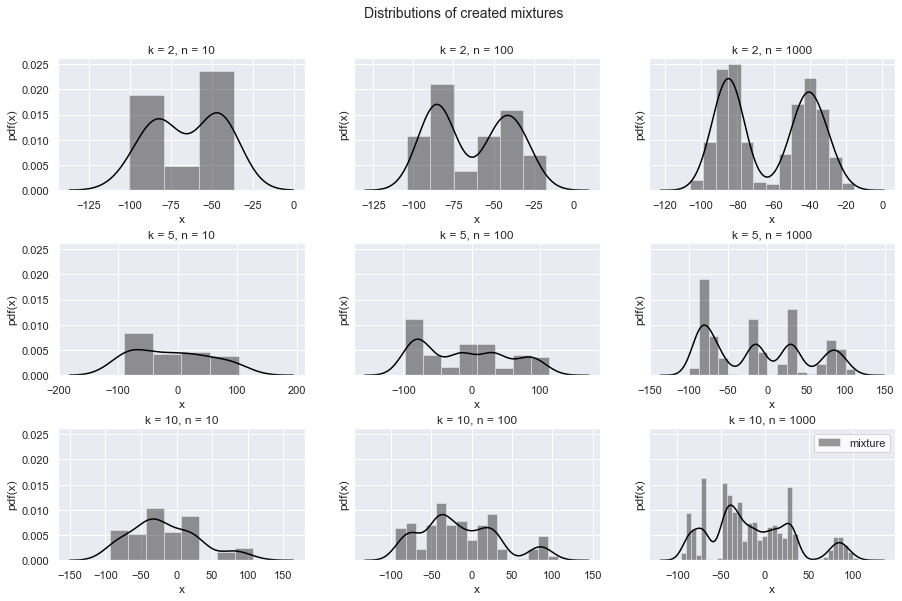

In [19]:
fig, axs = plt.subplots(3,3,figsize=(15,9), sharey=True)
fig.suptitle('Distributions of created mixtures', fontsize=14)
for i in range(len(k_grid)):
    for j in range(len(n_grid)):
        cur_mix = mixtures[i * 3 + j]
        axs[i][j].set_title('k = ' + str(k_grid[i]) + ', n = ' + str(n_grid[j]))
        axs[i][j].set(ylabel='pdf(x)', xlabel='x')
        sns.distplot(cur_mix, ax=axs[i][j], color='black', label='mixture')
plt.legend(facecolor='w')
plt.subplots_adjust(hspace=0.4, top = 0.9)

*Как бы могло выглядеть настоящее распределение по кластерам (с заданными истинными значениями параматров):*

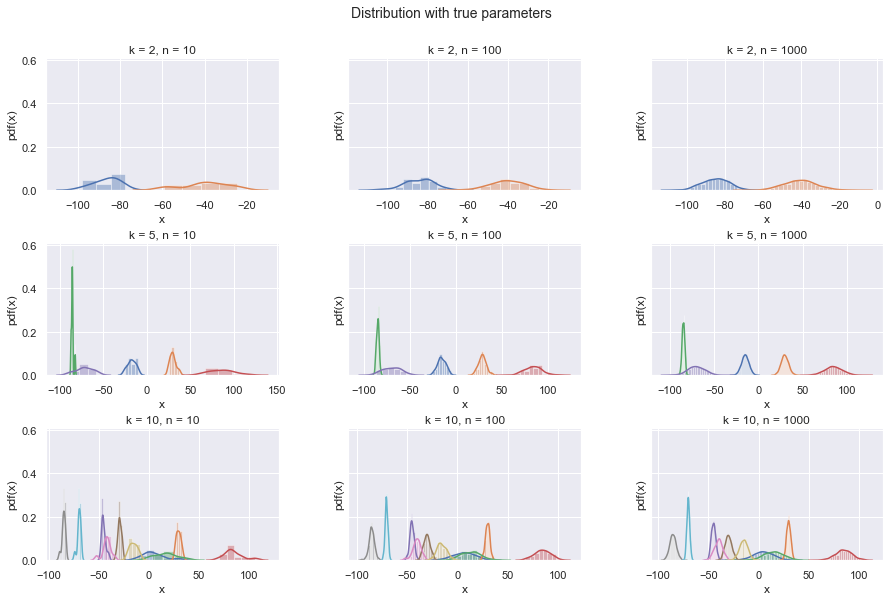

In [20]:
fig, axs = plt.subplots(3,3,figsize=(15,9), sharey=True)
fig.suptitle('Distribution with true parameters', fontsize=14)
for i in range(3):
    for j in range(3):
        axs[i][j].set_title('k = ' + str(k_grid[i]) + ', n = ' + str(n_grid[j]))
        axs[i][j].set(ylabel='pdf(x)', xlabel='x')
        for mu, sigma in theta_true[i]:
            sns.distplot(np.random.normal(mu, sigma, n_grid[j]), ax=axs[i][j])
plt.subplots_adjust(hspace=0.4, top = 0.9, wspace=0.3)

*Нарисуем историю ошибок для каждой пары параметров:*

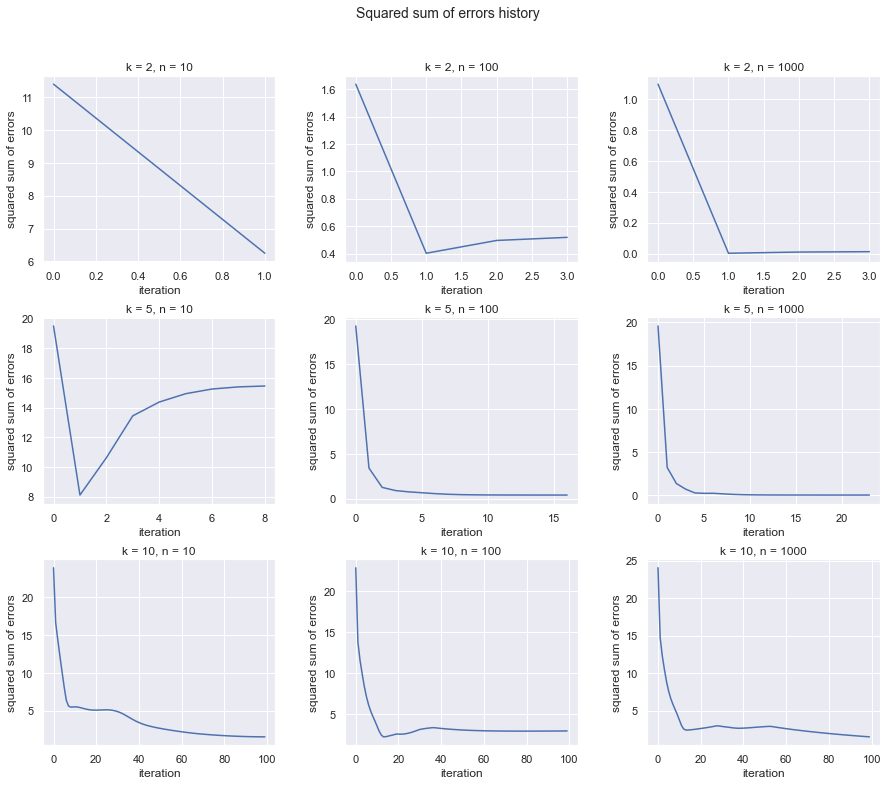

In [21]:
fig, axs = plt.subplots(3,3,figsize=(15,12))
fig.suptitle('Squared sum of errors history', fontsize=14)
for i in range(3):
    for j in range(3):
        k = k_grid[i]
        n = n_grid[j]
        axs[i][j].set_title('k = ' + str(k) + ', n = ' + str(n))
        axs[i][j].set(ylabel='squared sum of errors', xlabel='iteration')
        cur_theta_true = theta_true[i]
        cur_theta_history = theta_history[i * 3 + j]
        score_history = []
        for cur_theta_est in cur_theta_history:
            error = 0
            for (mu_true, sigma_true), (mu_est, sigma_est, gamma_est) in zip(np.sort(cur_theta_true, axis=0), np.sort(cur_theta_est, axis=0)):
                error += (mu_true - mu_est) ** 2 + (sigma_true - sigma_est) ** 2 + (1 / k - gamma_est) ** 2
            score_history.append(error / (3 * k))
        axs[i][j].plot(score_history)
plt.subplots_adjust(hspace=0.3, top = 0.9, wspace=0.3)

*По графикам можно заметить:*
- *при смесях с двумя классами алгоритм заканчивается при небольшом количестве итераций (2-3), поскольку эти два класса хорошо разделимы (см. графики выше), при этом ошибки сходятся к нулю при $n=1000$ (в остальных случаях небольшое количество наблюдений результировало в более плохом результате работы алгоритма);*
- *при разделении смеси с 5 классами уже можно увидеть, что 10 наблюдений по классу не хватает для корректной работы алгоритма (как можно увидеть, ошибка значительно увеличивается);*
- *при смеси с 10 классами при $n=1000$ алгоритм работает значительно лучше, чем при $n=10,100$*

*Для наглядности выведем истинные параметры и их оценки:*

In [22]:
for i in range(len(k_grid)):
    for j in range(len(n_grid)):
        cur_theta_true = theta_true[i]
        cur_theta_est = theta_est[i * 3 + j]
        print('k =', k_grid[i], 'n =', n_grid[j], ':')
        print('\tTheta true:\t\t\tTheta estimated')
        for (mu_true, sigma_true), (mu_est, sigma_est, gamma_est) in zip(np.sort(cur_theta_true, axis=0), np.sort(cur_theta_est, axis=0)):
            print('\tmu = %.4f, sigma = %.4f\tmu= %.4f, sigma = %.4f, p = %.4f' % (mu_true, sigma_true, mu_est, sigma_est, gamma_est))

k = 2 n = 10 :
	Theta true:			Theta estimated
	mu = -85.0000, sigma = 7.1377	mu= -84.0733, sigma = 5.2784, p = 0.5000
	mu = -40.0000, sigma = 8.4756	mu= -45.7003, sigma = 7.6580, p = 0.5000
k = 2 n = 100 :
	Theta true:			Theta estimated
	mu = -85.0000, sigma = 7.1377	mu= -85.4907, sigma = 7.7395, p = 0.4972
	mu = -40.0000, sigma = 8.4756	mu= -41.0064, sigma = 9.7149, p = 0.5028
k = 2 n = 1000 :
	Theta true:			Theta estimated
	mu = -85.0000, sigma = 7.1377	mu= -85.1816, sigma = 7.0425, p = 0.4985
	mu = -40.0000, sigma = 8.4756	mu= -40.1368, sigma = 8.6115, p = 0.5015
k = 5 n = 10 :
	Theta true:			Theta estimated
	mu = -85.0000, sigma = 1.4664	mu= -85.1094, sigma = 2.0434, p = 0.1421
	mu = -70.0000, sigma = 4.1740	mu= -55.9014, sigma = 3.8201, p = 0.1800
	mu = -15.0000, sigma = 4.1740	mu= -14.4863, sigma = 7.5695, p = 0.1999
	mu = 30.0000, sigma = 9.7289	mu= 32.8313, sigma = 7.6852, p = 0.2200
	mu = 85.0000, sigma = 9.8621	mu= 87.9675, sigma = 10.2417, p = 0.2580
k = 5 n = 100 :
	Theta t

*Посчитаем усреднённые суммы квадратов ошибок оценок:*

In [23]:
print('Squared sum of errors:')
print()
best_res = None
worst_res = None
for i in range(len(k_grid)):
    for j in range(len(n_grid)):
        cur_theta_true = theta_true[i]
        cur_theta_est = theta_est[i * 3 + j]
        error = 0
        for (mu_true, sigma_true), (mu_est, sigma_est, gamma_est) in zip(np.sort(cur_theta_true, axis=0), np.sort(cur_theta_est, axis=0)):
            error += (mu_true - mu_est) ** 2 + (sigma_true - sigma_est) ** 2 + (1 / k_grid[i] - gamma_est) ** 2
        error /= (3 * k_grid[i])
        if (best_res == None) or (error < best_res[2]):
            best_res = (k_grid[i], n_grid[j], error)
        if (worst_res == None) or (error > worst_res[2]):
            worst_res = (k_grid[i], n_grid[j], error)
        print('k =', k_grid[i], 'n =', n_grid[j], ': %.4f' % error)

print('\nBest result: k = %d, n = %d, error = %.4f' % best_res)
print('Worst result: k = %d, n = %d, error = %.4f' % worst_res)

Squared sum of errors:

k = 2 n = 10 : 6.2462
k = 2 n = 100 : 0.5253
k = 2 n = 1000 : 0.0132
k = 5 n = 10 : 15.4789
k = 5 n = 100 : 0.4190
k = 5 n = 1000 : 0.0516
k = 10 n = 10 : 1.5668
k = 10 n = 100 : 2.9744
k = 10 n = 1000 : 1.4860

Best result: k = 2, n = 1000, error = 0.0132
Worst result: k = 5, n = 10, error = 15.4789


*Как можно ожидать, наименьшая ошибка наблюдается при разделении смеси с 1000 объектами в каждом кластере на два кластера (оценивание параметров только для двух классов, много наблюдений) и наибольшая ошибка при разделении на 5 кластеров смеси с 10 объектами в каждом кластере (слишком мало наблюдений, сложно по ним оценить истинное значение параметров, также, по графикам распределений можно увидеть, что классы пересекаются и поэтому разделить наблюдения между ними сложно).*

**Пункт 9.** После перебора разных значений `k` Гермионе стало интересно, что произойдёт, если поставить предполагаемое значение числа кластеров больше или меньше истинного. Проведите два эксперимента: выберите какое-нибудь небольшое значение $k$ и запустите EM-алгоритм с `k`, меньшим истинного, и `k`, большим истинного. Поясните полученные результаты.

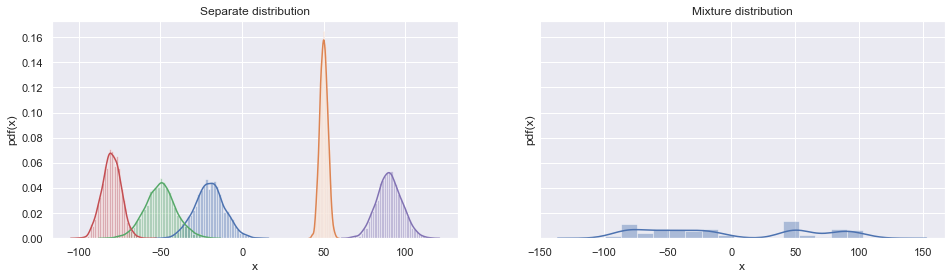

In [24]:
k = 5
mu_true_9 = np.random.choice(np.arange(-100,100,10), size=5)
sigma_true_9 = np.random.uniform(1, 10, size=5)
theta_true_9 = list(zip(mu_true_9, sigma_true_9))
fig, ax = plt.subplots(1, 2, figsize=(16,4), sharey=True)
ax[0].set_title('Separate distribution')
ax[0].set(xlabel='x', ylabel='pdf(x)')
for mu, sigma in theta_true_9:
    sns.distplot(np.random.normal(mu, sigma, 3000), ax=ax[0])
mixture_9 = create_mixture(mu_true_9, sigma_true_9, 1000)
ax[1].set_title('Mixture distribution')
ax[1].set(xlabel='x', ylabel='pdf(x)')
sns.distplot(mixture_9, ax=ax[1])
plt.show()

In [25]:
print('True theta')
for mu, sigma in np.sort(theta_true_9, axis=0):
    print('mu = %d, sigma = %.4f' % (mu, sigma))

True theta
mu = -80, sigma = 2.4122
mu = -50, sigma = 5.8077
mu = -20, sigma = 7.6954
mu = 50, sigma = 9.2406
mu = 90, sigma = 9.4443


In [26]:
theta_9_less, Q_9_less = EM(mixture_9, 3, initialize_theta(mixture_9, 3))
print('Dividing mixture by EM algorithm with less clusters:')
for mu, sigma, gamma in np.sort(theta_9_less, axis=0):
    print('mu = %.4f, sigma = %.4f, p = %.4f' % (mu, sigma, gamma))

Dividing mixture by EM algorithm with less clusters:
mu = -80.5579, sigma = 5.4611, p = 0.1819
mu = -36.9242, sigma = 19.3272, p = 0.4003
mu = 69.8627, sigma = 20.7857, p = 0.4179


In [27]:
theta_9_more, Q_9_more = EM(mixture_9, 7, initialize_theta(mixture_9, 7))
print('Dividing mixture by EM algorithm with more clusters:')
for mu, sigma, gamma in np.sort(theta_9_more, axis=0):
    print('mu = %.4f, sigma = %.4f, p = %.4f' % (mu, sigma, gamma))

Dividing mixture by EM algorithm with more clusters:
mu = -80.7748, sigma = 2.4528, p = 0.0098
mu = -59.1699, sigma = 5.3522, p = 0.0907
mu = -47.4530, sigma = 7.1749, p = 0.1297
mu = -19.7432, sigma = 7.4389, p = 0.1813
mu = 50.0102, sigma = 8.1334, p = 0.1902
mu = 81.4652, sigma = 9.0116, p = 0.1983
mu = 90.2491, sigma = 11.3919, p = 0.2000


*Можно заметить, что при разделении смеси из 5 кластеров на меньшее количество кластеров (3) алгоритм разделяет центры наблюдений довольно равномерно по всем наблюдениям (-80, -36, 70), при этом оценки получаются "между" истинными значениями - (-36 между -50 и -20, 70 между 50 и 90). $\hat{\sigma}$ для классов значительно больше, чем истинные параметры (истинные параметры $\sigma$ доходят до 9.4, тогда как оценки получаются равными 5.46, 19.33 и 20.79). Таким образом, разбросы становятся намного больше истинных значений, что ожидаемо, поскольку наблюдения на самом деле разделяются на 5 классов (поэтому при оценивании в три кластера приходится "расширять" границы класса). Вероятности попадания в классы больше для двух последних классов больше истинных (равны 0.4, тогда как для первого класса вероятность равна 0.2), что опять же можно объяснить тем, что в эти два класса попадает намного больше наблюдений (~ $1000 \cdot 4$), чем в первый (~1000).*

*При разделении смеси на большее количество кластеров (7 вместо 5) можем заметить, что алгоритм оценивает параметры истинных кластеров и "добавляет" параметры кластеров между ними (так, например, в истинной модели нет кластеров с $\mu = -60$ и $\mu = 80$, однако алгоритм добавляет такие кластеры). Для существующих кластеров оценки параметров находятся довольно близкие к реальным значениям (судя по $\hat{\mu}, \hat{\sigma}$), вероятности распределения объектов по классам варьируются - для первого кластера выдаётся значение 0.009 (тогда как реальное значение - 0.2), что можно объяснить тем, что большая часть наблюдений распределяется между 6-ю остальными классами, из-за чего оценка вероятности получается намного ниже истинного значения.*

### Задача 2: "Cloudy, with a chance of..." (5 баллов).

В этой задаче нам предстоит проанализировать набор данных [Weather in Szeged 2006-2016](https://www.kaggle.com/budincsevity/szeged-weather), содержащий информацию о погоде. Формат задачи свободный: оцениваются любые разумные действия. В качестве зависимой переменной возьмём температуру воздуха (`temperature`).

Наша цель состоит в том, чтобы построить две линейные регрессионные модели: объясняющую и предиктивную. Объясняющая модель должна быть пригодна для статистической интерпретации зависимостей, то есть показывать, какие факторы влияют на температуру воздуха, каким образом и какое возможное объяснение этого влияния можно привести. Предиктивная модель может быть совершенно ужасной с точки зрения статистики (например, регрессия может быть не значимой в целом), но она должна давать хорошие прогнозы в соответствии с некоторой метрикой.

Хотя приведённые данные имеют формат временных рядов, мы будем игнорировать это и рассматривать их как обычные кросс-секционные данные.

**Предобработка данных**. Загрузите данные и проведите любую предобработку, которую считаете нужной. Поясните свои действия.

In [28]:
import pandas as pd
df = pd.read_csv('weatherHistory.csv')
df.head(2)

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.


*Поссмотрим, какого типа даны переменные, при необходимости приведём к нужным типам (например, дату к типу datetime):*

In [29]:
df.dtypes

Formatted Date               object
Summary                      object
Precip Type                  object
Temperature (C)             float64
Apparent Temperature (C)    float64
Humidity                    float64
Wind Speed (km/h)           float64
Wind Bearing (degrees)      float64
Visibility (km)             float64
Loud Cover                  float64
Pressure (millibars)        float64
Daily Summary                object
dtype: object

In [30]:
df['Formatted Date'] = pd.to_datetime(df['Formatted Date'], utc=True)

*Разделим временную отметку на переменные месяц, час:*

In [31]:
df['Hour'] = df['Formatted Date'].dt.hour
df['Month'] = df['Formatted Date'].dt.month
df.drop(columns='Formatted Date', inplace=True)

*Переименуем названия признаков:*

In [32]:
df.columns

Index(['Summary', 'Precip Type', 'Temperature (C)', 'Apparent Temperature (C)',
       'Humidity', 'Wind Speed (km/h)', 'Wind Bearing (degrees)',
       'Visibility (km)', 'Loud Cover', 'Pressure (millibars)',
       'Daily Summary', 'Hour', 'Month'],
      dtype='object')

In [33]:
df.rename(columns={'Precip Type':'precip', 'Temperature (C)':'temperature', 
                   'Apparent Temperature (C)':'app_temperature', 
                   'Wind Speed (km/h)': 'wind_speed', 'Wind Bearing (degrees)':'wind_bearing', 
                   'Visibility (km)':'visibility', 'Pressure (millibars)':'pressure'}, inplace=True)

*Проверим на наличие пропусков, заполним их:*

In [34]:
df.isna().sum()

Summary              0
precip             517
temperature          0
app_temperature      0
Humidity             0
wind_speed           0
wind_bearing         0
visibility           0
Loud Cover           0
pressure             0
Daily Summary        0
Hour                 0
Month                0
dtype: int64

In [35]:
df['precip'].fillna('none', inplace=True)

*Посмотрим на уникальное количество значений для каждого признака, удалим ненужные (Loud Cover принимает одно значение для всех наблюдений):*

In [36]:
df.nunique()

Summary              27
precip                3
temperature        7574
app_temperature    8984
Humidity             90
wind_speed         2484
wind_bearing        360
visibility          949
Loud Cover            1
pressure           4979
Daily Summary       214
Hour                 24
Month                12
dtype: int64

In [37]:
df.drop(columns=['Loud Cover'], inplace=True)

*Рассмотрим распределения признаков:*

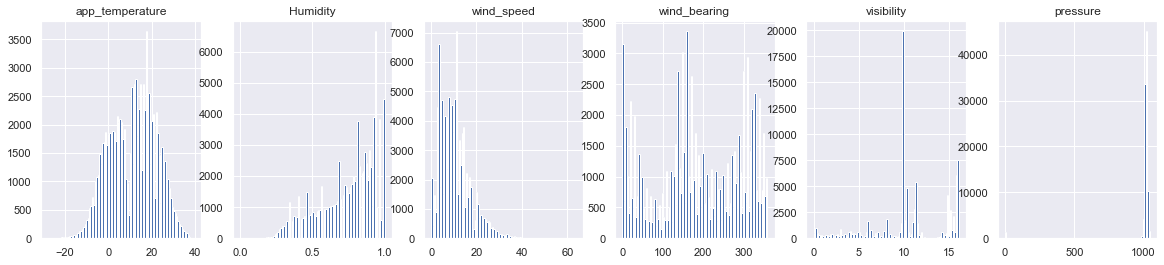

In [38]:
fig, ax = plt.subplots(1, 6, figsize=(20,4))
i = 0
for col in df.columns:
    if df[col].dtypes != 'float64' or col == 'temperature':
        continue
    ax[i].hist(df[col], bins=100)
    ax[i].set_title(col)
    i += 1
plt.show()

*Заметим, что у признака давления есть нулевые значения, удалим их (будем считать, что они являются выбросами):*

In [39]:
df = df[df.pressure != 0]

**Построение объясняющей модели.**

**Пункт 1.** Выберите независимые переменные, которые будут включены в объясняющую модель. Поясните, почему выбор этих переменных разумен (не нужно углубляться в физику поведения жидкостей и ссылаться на уравнения Навье-Стокса, достаточно понятной научно-популярной интерпретации).

*Берём: `Hour`, `Month` (в разное время суток разная температура (днём теплее, чем ночью), в разное время года температура разная (летом в месте измерения данных теплее, чем зимой)), `wind_bearing`, `wind_speed` (от ветра (скорости и направления) зависит температура), `Humidity`, `pressure` (давление и влажность воздуха связаны с температурой), `precip` (наличие осадков, например, снега или дождя, может идентифицировать более холодную/тёплую погоду), `visibility` (видимость, вероятно, также могла бы предсказывать температуру воздуха (при хорошей видимости, возможно, температура ниже))*

*Не берём: `Apparent Temperature (C)` (неодносторонняя зависимость, скорее всего, по температуре считается apparent temperature, а не наоборот), `Daily Summary`, `Summary` (являются обобщениями других признаков)*

**Пункт 2.** Изучите зависимости между зависимой переменной и выбранными вами независимыми переменными. На основе проведённого анализа задайте функциональную форму модели. Например:

$$
\ln y_i = \beta_0 + \beta_1X_{1i} + \beta_2X_{1i}^2 + \beta_3\ln X_{3i} + u_i
$$

Запишите выбранный вид модели в ячейке Markdown ниже и прокомментируйте, почему он разумен (например, почему разумно взять не просто $X_1$, но ещё и его квадрат или взять не просто $y$, а его логарифм).

*Рассмотрим зависимости температуры от выбранных признаков:*

In [40]:
features = ['Humidity', 'wind_speed', 'wind_bearing', 'visibility', 'Hour', 'Month', 'pressure', 'precip']

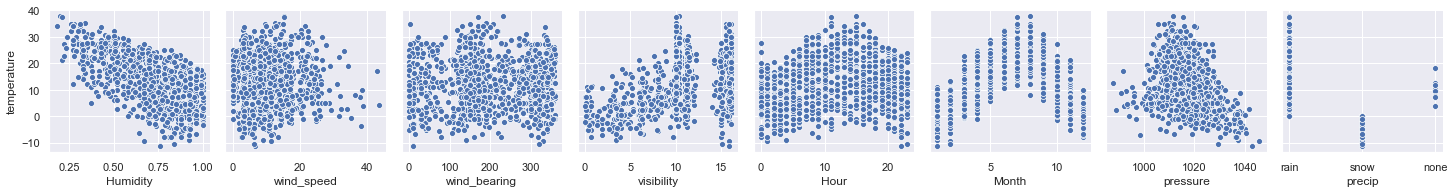

In [41]:
sns.pairplot(df.sample(1000), x_vars = features, y_vars='temperature')
plt.show()

*Исходя из построенного графика возьмём логарифм от скорости ветра, направления ветра и видимости, остальные признаки возьмём без изменений (`precip`, `Hour`, `Month` будем считать категориальными и разделять их на бинарные признаки one-hot-кодированием):*

$$temperature = \beta_0 + \beta_1 humidity + \beta_2 pressure + \beta_3 \ln{(wind\_speed)} + \beta_4 \ln{(wind\_bearing)} + \beta_5 \ln{(visibility)} + \beta_6 hour_0 +...+\beta_{29} hour_{23} + \beta_{30} month_1 + ... + \beta_{41} month_{12} + \beta_{42} prepcip\_rain + \beta_{43} precip\_snow + \beta_{44} precip\_none$$

**Пункт 3.** Оцените выбранную модель при помощи МНК. Значима ли регрессия в целом? Если да, переходите к следующему пункту, если нет, то задайте другую функциональную форму модели.

In [42]:
import statsmodels.formula.api as smf

In [43]:
model = smf.ols(data = df, formula = ' temperature ~ Humidity + np.log1p(wind_speed) + np.log1p(wind_bearing) + \
np.log1p(visibility) + pressure + C(Month) + C(Hour) + precip').fit()

In [44]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            temperature   R-squared:                       0.876
Model:                            OLS   Adj. R-squared:                  0.876
Method:                 Least Squares   F-statistic:                 1.640e+04
Date:                Fri, 04 Dec 2020   Prob (F-statistic):               0.00
Time:                        20:50:55   Log-Likelihood:            -2.5039e+05
No. Observations:               95165   AIC:                         5.009e+05
Df Residuals:                   95123   BIC:                         5.013e+05
Df Model:                          41                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                166.5127      1.678     99.261      0.000     163.225     169.801
C(Month)[T.2]             -0.1656      0.054     -3.038      0.002      -0.272      -0.059
C(Month)[T.3]              1.2852      0.056     22.912      0.000       1.175       1.395
C(Month)[T.4]              5.2021      0.059     87.880      0.000       5.086       5.318
C(Month)[T.5]             10.0050      0.058    171.917      0.000       9.891      10.119
C(Month)[T.6]             13.7436      0.059    233.324      0.000      13.628      13.859
C(Month)[T.7]             15.2205      0.060    255.785      0.000      15.104      15.337
C(Month)[T.8]             14.6165      0.060    244.215      0.000      14.499      14.734
C(Month)[T.9]             10.9082      0.059    186.398      0.000      10.794      11.023
C(Month)[T.10]             6.5933      0.057    116.231      0.000       6.482       6.704
C(Month)[T.11]             2.8565      0.055     51.594      0.000       2.748       2.965
C(Month)[T.12]             0.8187      0.054     15.281      0.000       0.714       0.924
C(Hour)[T.1]              -0.2422      0.075     -3.214      0.001      -0.390      -0.094
C(Hour)[T.2]              -0.3918      0.075     -5.198      0.000      -0.540      -0.244
C(Hour)[T.3]              -0.4311      0.075     -5.744      0.000      -0.578      -0.284
C(Hour)[T.4]              -0.4289      0.076     -5.670      0.000      -0.577      -0.281
C(Hour)[T.5]               0.0067      0.076      0.088      0.930      -0.142       0.155
C(Hour)[T.6]               0.6133      0.075      8.131      0.000       0.465       0.761
C(Hour)[T.7]               1.1592      0.076     15.208      0.000       1.010       1.309
C(Hour)[T.8]               1.7084      0.077     22.231      0.000       1.558       1.859
C(Hour)[T.9]               2.0552      0.077     26.701      0.000       1.904       2.206
C(Hour)[T.10]              2.3946      0.078     30.674      0.000       2.242       2.548
C(Hour)[T.11]              2.5749      0.079     32.749      0.000       2.421       2.729
C(Hour)[T.12]              2.5769      0.079     32.813      0.000       2.423       2.731
C(Hour)[T.13]              2.6675      0.079     33.724      0.000       2.513       2.823
C(Hour)[T.14]              2.5472      0.079     32.219      0.000       2.392       2.702
C(Hour)[T.15]              2.2344      0.078     28.565      0.000       2.081       2.388
C(Hour)[T.16]              1.9939      0.078     25.641      0.000       1.841       2.146
C(Hour)[T.17]              1.6074      0.077     20.898      0.000       1.457       1.758
C(Hour)[T.18]              1.1474      0.076     15.133      0.000       0.999       1.296
C(Hour)[T.19]              0.8153      0.076     10.766      0.000       0.667  

*Из большого F-значения (1.64е+4) (и p-value < 0.05) можем заметить, что гипотеза $H_0: \beta_1,...,\beta_l = 0$ отвергается, значит, регрессия в целом значима. Коэффициент детерминированности ($R^2$) довольно большой.*

**Пункт 4.** Прокомментируйте значимость отдельных коэффициентов в оценённой модели. Поясните, как каждый регрессор влияет на зависимую переменную математически ("при увеличении $X$ на 1 $Y$ увеличивается на 3") и содержательно ("$X$ влияет на $Y$ положительно, потому что...", "$X$ не оказывает влияния на $Y$, потому что..."). Запишите ваши рассуждения в ячейку Markdown ниже.

*Значимость отдельных определим по t-статистикам и доверительным интервалам, данным в model.summary() из предыдущего пункта (если $t$ входит в доверительный интервал, то гипотеза $H_0: \beta_i = 0$ не опровергается и регрессор считается незначимым).*
*Заметим, что гипотеза не опровергается только для регрессорa C(Hour)[T.5] (т.е. он является незначимым)*

*Рассмотрим, как каждый регрессор влияет на зависимую переменную:*
- *`humidity` (-16.6): Отрицательная зависимость - при увеличении влажности на 1 температура уменьшается на 16.6. При высокой температуре воздух может содержать больше молекул воды и относительная влажность понижается;*
- *`pressure` (-0.15): Отрицательная зависимость - при увеличении давления на 1 температура уменьшается на 0.15*
- *ln(1 + `wind_speed`) (-0.52): Отрицательная зависимость - при увеличении скорости ветра на 1 температура уменьшается на 0.52 (в более ветреную погоду температура воздуха ниже);*
- *ln(1 + `wind_bearing`) (0.075): Положительная зависимость - при увеличении направления ветра на 1 температура увеличивается на 0.075;*
- *ln(1 + `visibility`) (-0.6): Отрицательная зависимость - при увеличении видимости на 1 температура уменьшается на 0.6, вероятно, при более холодной температуре видимость лучше;*
- *`rain` (1.87): Положительная зависимость - при увеличении температуры как правило также увеличивается кол-во осадков;*
- *`snow` (-4.74): Отрицательная зависимость - при снежной погоде температура будет ниже среднего (средняя температура - 12 градусов);*
- *`Hour`: для времени с 1-4 часов наблюдается отрицательная зависимость (в это время воздух холоднее), в остальные часы зависимось положительная, причём наибольшие коэффициенты (в районе 2.5) получаются с 10-15 часов (в дневное время температура выше);*
- *`Month`: в феврале наблюдается отрицательная зависимость, в остальные месяцы зависимость положительная, к июлю зависимость становится наибольшей (коэффициент - 15.2), после этого коэффициенты убывают к нулю (самое тёплое время года - лето)*

**Пункт 5.** Есть ли в модели проблема мультиколлинеарности? Используйте как минимум два показателя (на ваш выбор), чтобы подтвердить ваш ответ. Если проблема обнаружена, скорректируйте её, или приведите обоснование, почему корректировка не требуется.

1) *Condition number велико (1.57е+5) (см. model.summary() из пункта 3), что является индикатором мультиколлинеарности*

2) *Рассмотрим VIF (variance inflation factor). Заметим, что для признаков снега и дождя значения большие (> 15), что показывает, что они коллинеарны другим регрессорам.*

In [45]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [46]:
for i in range(1,model.model.exog.shape[1]):
    print(model.model.exog_names[i], '%.4f' % variance_inflation_factor(model.model.exog, i), sep=': ')

C(Month)[T.2]: 1.7861
C(Month)[T.3]: 2.0561
C(Month)[T.4]: 2.2425
C(Month)[T.5]: 2.2208
C(Month)[T.6]: 2.2051
C(Month)[T.7]: 2.3312
C(Month)[T.8]: 2.3492
C(Month)[T.9]: 2.1689
C(Month)[T.10]: 2.0991
C(Month)[T.11]: 1.9589
C(Month)[T.12]: 1.8395
C(Hour)[T.1]: 1.9031
C(Hour)[T.2]: 1.9026
C(Hour)[T.3]: 1.9183
C(Hour)[T.4]: 1.9109
C(Hour)[T.5]: 1.9160
C(Hour)[T.6]: 1.9379
C(Hour)[T.7]: 1.9402
C(Hour)[T.8]: 1.9640
C(Hour)[T.9]: 2.0185
C(Hour)[T.10]: 2.0337
C(Hour)[T.11]: 2.0584
C(Hour)[T.12]: 2.1001
C(Hour)[T.13]: 2.0883
C(Hour)[T.14]: 2.0807
C(Hour)[T.15]: 2.0825
C(Hour)[T.16]: 2.0203
C(Hour)[T.17]: 1.9748
C(Hour)[T.18]: 1.9579
C(Hour)[T.19]: 1.9208
C(Hour)[T.20]: 1.9121
C(Hour)[T.21]: 1.9200
C(Hour)[T.22]: 1.9037
C(Hour)[T.23]: 1.9032
precip[T.rain]: 19.7870
precip[T.snow]: 20.2022
Humidity: 2.3018
np.log1p(wind_speed): 1.3116
np.log1p(wind_bearing): 1.0535
np.log1p(visibility): 1.5536
pressure: 1.3104


*Поскольку признаки с высокими VIF (наличие снега/дождя) относятся к одной категории, они будут коррелировать между собой и выдавать высокие значения VIF. Однако эти признаки не влияют на значимость других регрессоров и на значимость регрессии в целом, поэтому корректировка не требуется.*

**Пункт 6.** Проведите как минимум три теста для идентификации гетероскедастичности. Если гетероскедастичность обнаружена, скорректируйте доверительные интервалы для коэффициентов каким-нибудь способом. Изменилась ли значимость каких-либо коэффициентов?

*Рассмотрим три теста на уровне значимости в 5%. Определим, отвергнуты ли гипотезы по подсчитанным p-value (для F-статистик):*

In [47]:
import statsmodels.stats.api as sms
print('Goldfeld-Quandt test: p-value = %.4f' % sms.het_goldfeldquandt(model.model.endog, model.model.exog)[1])
# returns (f-stat, p-val)
print('Breusch-Pagan test: p-value = %.4f' % sms.het_breuschpagan(model.resid, model.model.exog)[3])
# returns (lm, lm p-val, f-stat, p-val)
print('White test: p-value = %.4f' % sms.het_white(model.resid, model.model.exog)[3])
# returns (lm, lm p-val, f-stat, p-val)

Goldfeld-Quandt test: p-value = 0.0062
Breusch-Pagan test: p-value = 0.0000
White test: p-value = 0.0000


*Для всех трёх тестов p-value меньше выбранного порога 0.05, значит, гипотезы отвергаются, выявлена гетероскадастичность. Скорректируем оценкой White (HC0):*

In [48]:
model_hc = smf.ols(data = df, formula = ' temperature ~ Humidity + np.log1p(wind_speed) + np.log1p(wind_bearing) + \
np.log1p(visibility) + pressure + C(Month) + C(Hour) + C(precip)').fit(cov_type = 'HC0')
model_hc.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            temperature   R-squared:                       0.876
Model:                            OLS   Adj. R-squared:                  0.876
Method:                 Least Squares   F-statistic:                 1.735e+04
Date:                Fri, 04 Dec 2020   Prob (F-statistic):               0.00
Time:                        20:52:21   Log-Likelihood:            -2.5039e+05
No. Observations:               95165   AIC:                         5.009e+05
Df Residuals:                   95123   BIC:                         5.013e+05
Df Model:                          41                                         
Covariance Type:                  HC0                                         
==========================================================================================
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                166.5127      1.727     96.402      0.000     163.127     169.898
C(Month)[T.2]             -0.1656      0.057     -2.888      0.004      -0.278      -0.053
C(Month)[T.3]              1.2852      0.055     23.553      0.000       1.178       1.392
C(Month)[T.4]              5.2021      0.058     89.032      0.000       5.088       5.317
C(Month)[T.5]             10.0050      0.055    181.142      0.000       9.897      10.113
C(Month)[T.6]             13.7436      0.057    241.959      0.000      13.632      13.855
C(Month)[T.7]             15.2205      0.055    275.334      0.000      15.112      15.329
C(Month)[T.8]             14.6165      0.055    264.238      0.000      14.508      14.725
C(Month)[T.9]             10.9082      0.056    194.355      0.000      10.798      11.018
C(Month)[T.10]             6.5933      0.058    112.763      0.000       6.479       6.708
C(Month)[T.11]             2.8565      0.055     52.235      0.000       2.749       2.964
C(Month)[T.12]             0.8187      0.051     16.146      0.000       0.719       0.918
C(Hour)[T.1]              -0.2422      0.071     -3.417      0.001      -0.381      -0.103
C(Hour)[T.2]              -0.3918      0.071     -5.515      0.000      -0.531      -0.253
C(Hour)[T.3]              -0.4311      0.071     -6.100      0.000      -0.570      -0.293
C(Hour)[T.4]              -0.4289      0.072     -5.995      0.000      -0.569      -0.289
C(Hour)[T.5]               0.0067      0.071      0.094      0.925      -0.132       0.146
C(Hour)[T.6]               0.6133      0.070      8.801      0.000       0.477       0.750
C(Hour)[T.7]               1.1592      0.072     16.045      0.000       1.018       1.301
C(Hour)[T.8]               1.7084      0.074     22.952      0.000       1.563       1.854
C(Hour)[T.9]               2.0552      0.076     27.198      0.000       1.907       2.203
C(Hour)[T.10]              2.3946      0.079     30.422      0.000       2.240       2.549
C(Hour)[T.11]              2.5749      0.081     31.968      0.000       2.417       2.733
C(Hour)[T.12]              2.5769      0.081     31.898      0.000       2.419       2.735
C(Hour)[T.13]              2.6675      0.082     32.575      0.000       2.507       2.828
C(Hour)[T.14]              2.5472      0.082     31.197      0.000       2.387       2.707
C(Hour)[T.15]              2.2344      0.079     28.154      0.000       2.079       2.390
C(Hour)[T.16]              1.9939      0.077     25.732      0.000       1.842       2.146
C(Hour)[T.17]              1.6074      0.074     21.616      0.000       1.462       1.753
C(Hour)[T.18]              1.1474      0.072     15.971      0.000       1.007       1.288
C(Hour)[T.19]              0.8153      0.071     11.404      0.000       0.675  

*По статистикам для каждого коэффициента видно, что значимости не изменились.*

**Пункт 7.** Проведите какой-нибудь тест для идентификации эндогенности. Если эндогенность обнаружена, скорректируйте её каким-нибудь способом.

[statsmodels: IV2SLS](https://www.statsmodels.org/stable/_modules/statsmodels/sandbox/regression/gmm.html)

In [49]:
from statsmodels.sandbox.regression.gmm import IV2SLS
resultIV = IV2SLS(model.model.endog, model.model.exog, model.model.exog).fit()
print('Hausman test: p-value = %.4f' % resultIV.spec_hausman()[1])    # returns (hausman-statistic, p-value, degrees of freedom)

Hausman test: p-value = 1.0000


*Получаем, что гипотеза не отвергается, эндогенность не выявлена.*

**Пункт 8.** Если после проведённых корректировок интерпретация каких-либо параметров модели изменилась, приведите новую интерпретацию. Сделайте финальный вывод о том, какие факторы влияют на температуру воздуха.

*Из полученных результатов можем заметить, что на температуру влияют наличие осадков (относительно большие коэффициенты у признаков наличия снега и дождя), влажность (большой отрицательный коэффициент), а также время записи наблюдения - в дневное время суток и летом температура воздуха теплее, чем ночью и зимой.*

*Такие факторы, как направление и скорость ветра и видимость (вернее, их логарифмы) также влияют на температуру, но в меньшей степени. Вероятно, модель могла бы быть лучше, если бы эти признаки были взяты в другом виде (и признаки в целом были отшкалированы).*

**Построение предиктивной модели.**

Воспользуйтесь вашими знаниями из машинного обучения и постройте хорошую предиктивную линейную регрессионную модель для предсказания температуры воздуха. Используйте MAE для выбора лучшей модели. 

In [50]:
df[features]

,Humidity,wind_speed,wind_bearing,visibility,Hour,Month,pressure,precip
0,0.89,14.1197,251.0,15.8263,22,3,1015.13,rain
1,0.86,14.2646,259.0,15.8263,23,3,1015.63,rain
2,0.89,3.9284,204.0,14.9569,0,4,1015.94,rain
3,0.83,14.1036,269.0,15.8263,1,4,1016.41,rain
4,0.83,11.0446,259.0,15.8263,2,4,1016.51,rain
...,...,...,...,...,...,...,...,...
96448,0.43,10.9963,31.0,16.1000,17,9,1014.36,rain
96449,0.48,10.0947,20.0,15.5526,18,9,1015.16,rain
96450,0.56,8.9838,30.0,16.1000,19,9,1015.66,rain
96451,0.60,10.5294,20.0,16.1000,20,9,1015.95,rain


*Отмасштабируем числовые признаки и закодируем категориальные, добавим регуляризацию. Рассмотрим модели с разными значениями коэффициента регуляризации и выберем наилучшую модель по MAE:*

In [51]:
categorical_ft = ['Hour', 'Month', 'precip']
numerical_ft = ['Humidity', 'wind_speed', 'wind_bearing', 'visibility', 'pressure']

In [52]:
X = df[features]
y = df.temperature

In [53]:
from sklearn.linear_model import Ridge
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.metrics import mean_absolute_error

alpha_grid = np.logspace(-3,2,20)

best_model = None
best_mae = None
best_alpha = None

column_transformer = ColumnTransformer([
        ('ohe', OneHotEncoder(handle_unknown="ignore"), categorical_ft),
        ('scaling', StandardScaler(), numerical_ft)
    ])

for alpha in alpha_grid:
    ridge_pipeline = Pipeline(steps=[
        ('ohe_and_scaling', column_transformer),
        ('regression', Ridge(alpha=alpha))
    ])

    predict_model = ridge_pipeline.fit(X, y)
    #y_train_pred = predict_model.predict(X_train)
    y_pred = predict_model.predict(X)
    
    mae = mean_absolute_error(y_pred, y)
    if best_mae == None or mae < best_mae:
        best_mae = mae
        best_model = predict_model
        best_alpha = alpha
    print('alpha = %.4f' % alpha, 'MAE = %.4f' % mae)

alpha = 0.0010 MAE = 2.6640
alpha = 0.0018 MAE = 2.6640
alpha = 0.0034 MAE = 2.6640
alpha = 0.0062 MAE = 2.6640
alpha = 0.0113 MAE = 2.6640
alpha = 0.0207 MAE = 2.6640
alpha = 0.0379 MAE = 2.6640
alpha = 0.0695 MAE = 2.6640
alpha = 0.1274 MAE = 2.6640
alpha = 0.2336 MAE = 2.6640
alpha = 0.4281 MAE = 2.6640
alpha = 0.7848 MAE = 2.6640
alpha = 1.4384 MAE = 2.6639
alpha = 2.6367 MAE = 2.6639
alpha = 4.8329 MAE = 2.6639
alpha = 8.8587 MAE = 2.6638
alpha = 16.2378 MAE = 2.6637
alpha = 29.7635 MAE = 2.6636
alpha = 54.5559 MAE = 2.6634
alpha = 100.0000 MAE = 2.6635


In [54]:
print('Best model: alpha = %.4f' % best_alpha, 'MAE = %.4f' % best_mae)

Best model: alpha = 54.5559 MAE = 2.6634


**Сравнение объясняющей и предиктивной моделей.**

**Пункт 1.** Является ли предиктивная модель значимой в целом? Что можно сказать о значимости отдельных коэффициентов? 

*Посчитаем вручную t-статистики и p-value для регрессоров по следующим формулам (из сем. 8):*

$$\hat{\sigma}^2 = \frac{RSS}{n-k}, \quad \hat{Var}(\hat{\beta}) = \hat{\sigma}^2(X^T X)^{-1}$$
*Гипотеза о (не)значимости коэффициентов:*

$$
\begin{cases}
    H_0: \beta_i = 0 \\
    H_A : \beta_i \neq 0
\end{cases}, \quad t_i = \frac{\hat{\beta}_i}{\hat{\sigma}_{\hat{\beta}_i}} \stackrel{H_0}{\sim} t_{n-k}$$
*$n$ - число наблюдений, $k$ - число регрессоров*

*Гипотеза о (не)значимости регрессии в целом:*

$$
\begin{cases}
    H_0: \beta_1,...,\beta_k = 0 \\
    H_A : \beta_1^2 + ... + \beta_k^2 > 0
\end{cases}, \quad F = \frac{RSS_{R} - RSS_{UR} / (k_{UR} - k_{R})}{RSS_{UR} / (n - k_UR)} \stackrel{H_0}{\sim} F_{k_{UR}-k_{R}, n-k_{UR}}$$

*UR-модель:* $y_i = \beta_0 + \beta_1 x_{1i} + ... + \beta_k x_{ki} + u_i$

*R-модель:* $y_i = \beta_0 + u_i$

[t-statistics in sklearn](https://gist.github.com/brentp/5355925)

In [55]:
# get transformed matrix of regressors
X_tf = ColumnTransformer([
        ('ohe', OneHotEncoder(handle_unknown="ignore", sparse=False), categorical_ft),
        ('scaling', StandardScaler(), numerical_ft)
    ]).fit_transform(X)

X_tf = np.c_[ np.ones(X_tf.shape[0]), X_tf ]

In [56]:
from scipy import stats
# regressor significance
n = X_tf.shape[0]
k = X_tf.shape[1]    # number of regressors
sse = np.sum((best_model.predict(X) - y) ** 2, axis=0) / float(n - k)    # rss (unrestricted) / (n - k)
se = np.sqrt((sse * np.linalg.inv(np.dot(X_tf.T, X_tf))).diagonal())    # get array of sigmas

t = best_model['regression'].coef_ / se[1:]    # t-statistics for coefficients
t0 = best_model['regression'].intercept_ / se[0]    # t-statistic for intercept
p = 2 * (1 - stats.t.cdf(np.abs(t), n - k))    # p-value for coefficients
p0 = 2 * (1 - stats.t.cdf(np.abs(t0), n - k))    # p-values for intercept

In [57]:
# regression significance

rss_r = np.sum((y - np.mean(y)) ** 2, axis=0)    # rss_r
rss_ur = sse * (n - k)    # rss_ur
F = ((rss_r - rss_ur) / (k - 1)) / (rss_ur / (n - k))

In [58]:
F_crit = stats.f.ppf(1-.05, k - 1, n - k)    # 0.05 F-critical value for F_((k_ur - k_r), (n - k_ur))
print('F observed: %.4f' % F)
print('Critical value: %.4f' % F_crit)

F observed: 15459.9349
Critical value: 1.3747


In [59]:
# names of binary regressors (after one-hot-encoding)
binary_ft = []
for hour in range(0,24):
    binary_ft.append('Hour' + str(hour))
for month in range(1,13):
    binary_ft.append('Month' + str(month))
for pr in df.precip.unique():
    binary_ft.append(pr)

In [60]:
summary_1 = pd.DataFrame(index=['intercept'] + binary_ft + numerical_ft)
summary_1.loc[1:,'coef'] = best_model['regression'].coef_
summary_1.loc[1:,'t_statistic'] = t
summary_1.loc[1:,'p-value'] = p
summary_1.loc['intercept',:] = [best_model['regression'].intercept_, t0, p0]
summary_1

,coef,t_statistic,p-value
intercept,9.709196,6.640133e-06,0.999995
Hour0,-1.025211,-8.173216e-07,0.999999
Hour1,-1.235502,-9.848877e-07,0.999999
Hour2,-1.384664,-1.103789e-06,0.999999
Hour3,-1.470769,-1.172531e-06,0.999999
Hour4,-1.525815,-1.216310e-06,0.999999
Hour5,-1.116734,-8.902096e-07,0.999999
Hour6,-0.533061,-4.249322e-07,1.000000
Hour7,0.012526,9.984844e-09,1.000000
Hour8,0.564389,4.499058e-07,1.000000


*Регрессия в целом является значимой (судя по посчитанному значению F-статистики, которое больше критического), однако в отличие от объясняющей модели числовые регрессоры (небинарные) становятся незначимыми и имеют очень маленькие p-value (остальные регрессоры значимые - их p-value близки к 1).*

**Пункт 2.** Как различаются регрессоры объясняющей и предиктивной моделей? Есть ли такие регрессоры, которые вошли в одну, но не вошли в другую. Если да, приведите возможную содержательную интерпретацию этого явления.

*Числовые регрессоры в предиктивной модели становятся незначимыми и входят в регрессию с меньшими весами, чем другие регрессоры. Интересно заметить, что некоторые регрессоры могут иметь разные зависимости в моделях - так, например, признак наличия снега в объясняющей модели имел отрицательную зависимость, тогда как в построенной предиктивной модели коэффициент при этом признаке положительный. В обе модели вошли все регрессоры, однако при построении предиктивной модели можно было бы использовать L1 регуляризацию и таким образом обнулить наименее важные признаки.*

**Пункт 3.** На основе предыдущего анализа, сделайте вывод, можно ли использовать объясняющую модель для предсказания, а предиктивную -- для объяснений. Если да, то сравните предсказательную и объяснительную силу этих моделей на основе каких-нибудь метрик.

*Как можно было увидеть в п.1 и 2 некоторые регрессоры в предиктивной модели становятся незначимыми, тогда как в объясняющей они оставались значимыми (но при этом у признака `Humidity` в предиктивной модели коэффициент довольно большой). Также было замечено, что знаки коэффициентов также изменяются (например, у признака на наличие снега), что показывает некорректность использования предиктивной модели в качестве объясняющей.*

*Как известно из МО, использование регуляризации при неотмасштабированных числовых признаках не совсем корректно (а в объясняющей модели признаки не масштабировались), поэтому объясняющую модель не стоит использовать как предиктивную. Тем не менее, можно посмотреть на результат работы модели по MAE-метрике (для сравнения также выведем ещё раз ошибку на предиктивной модели):*

In [61]:
print('Statistical model MAE = %.4f' % mean_absolute_error(model_hc.predict(), y))

Statistical model MAE = 2.6824


In [62]:
print('Best predictive model MAE = %.4f' % best_mae)

Best predictive model MAE = 2.6634
